In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import ast
import os
import matplotlib.colors as mcolors
import cv2
import matplotlib.patches as patches

## Dataset Antigo

In [3]:
# Ler o csv 'concerta_2024-09-19.csv'
data1 = pd.read_csv('concerta_1a_formacao.csv')
data1['time'] = pd.to_datetime(data1['time'], format='mixed')
print(data1.shape)

(167640, 12)


## Dataset Novo

In [4]:
# Ler o csv 'concerta_2024-09-19.csv'
data2 = pd.read_csv('concerta_2024-09-30_tratado.csv')
data2['datetime'] = pd.to_datetime(data2['datetime'], format='mixed')
print(data2.shape)

(145612, 25)


### Comparar Engagement

### 1ª Formação

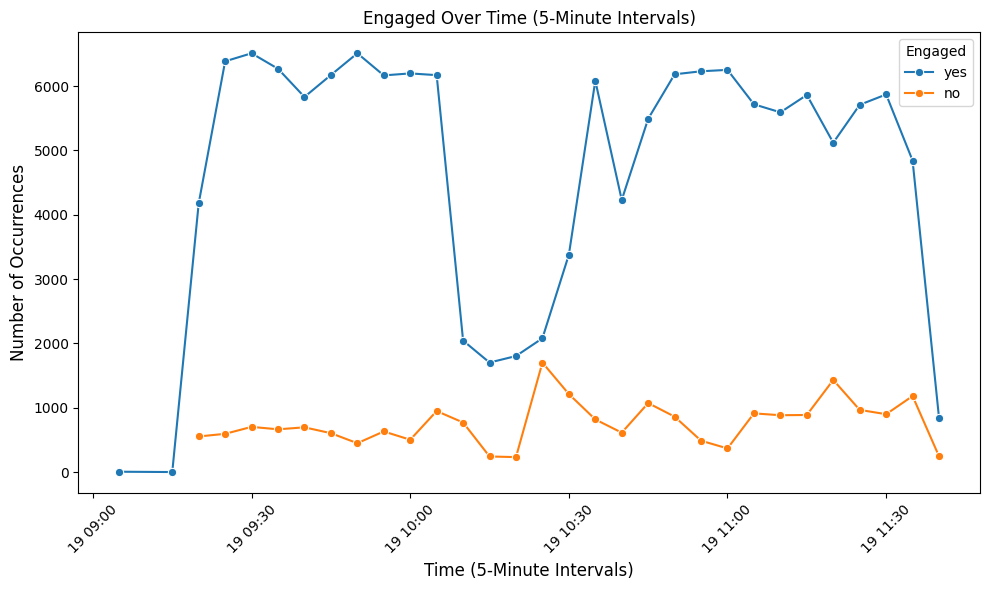

In [ ]:
data1['5min'] = data1['time'].dt.floor('5min')
engaged_count_5min = data1.groupby([data1['5min'], data1['engaged']]).size().reset_index(name='counts')


plt.figure(figsize=(10, 6))
sns.lineplot(data=engaged_count_5min, x='5min', y='counts', hue='engaged', marker="o")
plt.title('Engaged Over Time (5-Minute Intervals)')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Time (5-Minute Intervals)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Engaged')
plt.tight_layout()
plt.show()

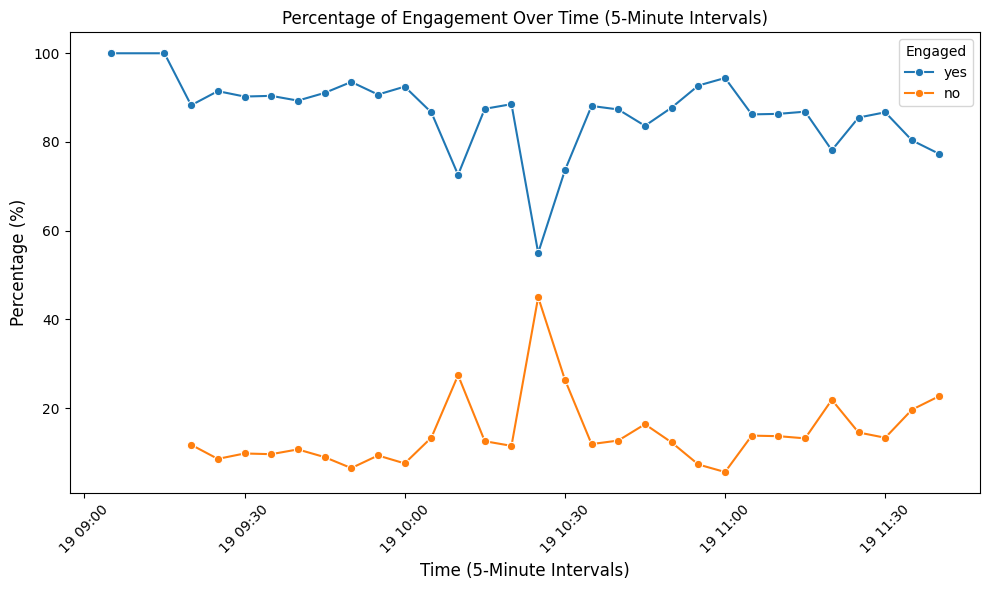

In [ ]:
data1['5min'] = data1['time'].dt.floor('5min')
total_counts_5min = data1.groupby('5min').size().reset_index(name='total_counts')

engaged_count_5min = data1.groupby(['5min', 'engaged']).size().reset_index(name='counts')
engaged_count_5min = engaged_count_5min.merge(total_counts_5min, on='5min')
engaged_count_5min['percentage'] = (engaged_count_5min['counts'] / engaged_count_5min['total_counts']) * 100

plt.figure(figsize=(10, 6))
sns.lineplot(data=engaged_count_5min, x='5min', y='percentage', hue='engaged', marker="o")
plt.title('Percentage of Engagement Over Time (5-Minute Intervals)')
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Time (5-Minute Intervals)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Engaged')
plt.tight_layout()
plt.show()


### 2ª Formação

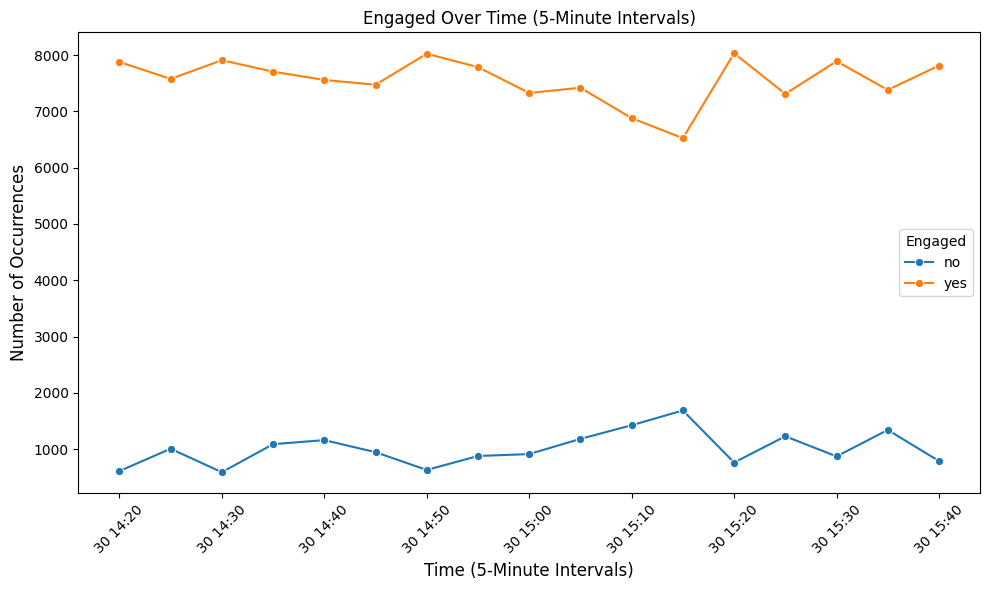

In [ ]:
data2['5min'] = data2['datetime'].dt.floor('5min')
engaged_count_5min = data2.groupby([data2['5min'], data2['engaged']]).size().reset_index(name='counts')


plt.figure(figsize=(10, 6))
sns.lineplot(data=engaged_count_5min, x='5min', y='counts', hue='engaged', marker="o")
plt.title('Engaged Over Time (5-Minute Intervals)')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Time (5-Minute Intervals)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Engaged')
plt.tight_layout()
plt.show()

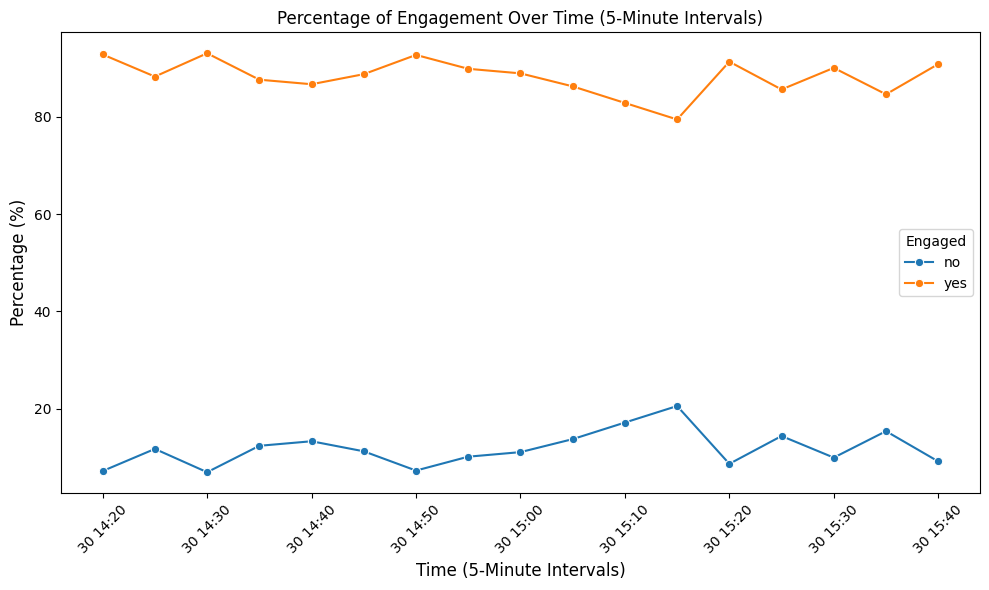

In [ ]:
data2['5min'] = data2['datetime'].dt.floor('5min')
total_counts_5min = data2.groupby('5min').size().reset_index(name='total_counts')

engaged_count_5min = data2.groupby(['5min', 'engaged']).size().reset_index(name='counts')
engaged_count_5min = engaged_count_5min.merge(total_counts_5min, on='5min')
engaged_count_5min['percentage'] = (engaged_count_5min['counts'] / engaged_count_5min['total_counts']) * 100

plt.figure(figsize=(10, 6))
sns.lineplot(data=engaged_count_5min, x='5min', y='percentage', hue='engaged', marker="o")
plt.title('Percentage of Engagement Over Time (5-Minute Intervals)')
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Time (5-Minute Intervals)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Engaged')
plt.tight_layout()
plt.show()


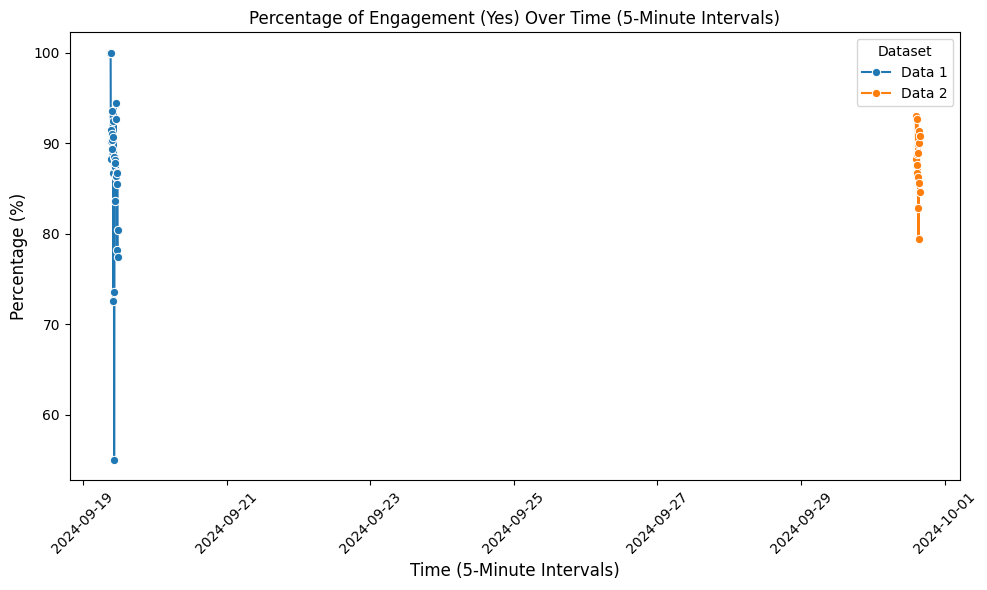

In [ ]:
data1['5min'] = data1['time'].dt.floor('5min')
data2['5min'] = data2['datetime'].dt.floor('5min')

def calculate_percentage(df):
    total_counts_5min = df.groupby('5min').size().reset_index(name='total_counts')
    engaged_count_5min = df[df['engaged'] == 'yes'].groupby('5min').size().reset_index(name='counts')
    engaged_count_5min = engaged_count_5min.merge(total_counts_5min, on='5min')
    engaged_count_5min['percentage'] = (engaged_count_5min['counts'] / engaged_count_5min['total_counts']) * 100
    return engaged_count_5min[['5min', 'percentage']]

engaged_percentage_data1 = calculate_percentage(data1)
engaged_percentage_data2 = calculate_percentage(data2)

plt.figure(figsize=(10, 6))
sns.lineplot(data=engaged_percentage_data1, x='5min', y='percentage', marker="o", label='Data 1')
sns.lineplot(data=engaged_percentage_data2, x='5min', y='percentage', marker="o", label='Data 2')

plt.title('Percentage of Engagement (Yes) Over Time (5-Minute Intervals)')
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Time (5-Minute Intervals)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()
